## Непрерывное распределение хи-квадрат.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Импортирую необходимые библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

### Задаю саму функцию распределения. k - число степеней свободы

In [3]:
value = []      # создаю пустой список, куда буду помещать сгенерированную выборку из распределения (список размера 1000 жэлементов)
value_5 = []    # создаю пустой список, куда буду помещать сгенерированную выборку из распределения (список размера 5000 жэлементов)
value_10 = []   # создаю пустой список, куда буду помещать сгенерированную выборку из распределения (список размера 10000 жэлементов)
value_50 = []   # создаю пустой список, куда буду помещать сгенерированную выборку из распределения (список размера 50000 жэлементов)
def chi(x):
    k = 1000.                       # задаю значение параметра k. Тысяча, потому что берём выборку размера 1000
    func = sts.chi2(k)              # Из модуля stats вызываю функцию хи-квадрат и называю её func
    value.append(func.rvs(1000))    # добавляю значения в исходные пустые списки
    value_5.append(func.rvs(5000))
    value_10.append(func.rvs(10000))
    value_50.append(func.rvs(50000))
    return func.pdf(x)              # Возвращаю функцию плотности распределения через pdf


In [4]:
x = np.arange(800,1200,0.5)  # Генерирую значения x
print (chi(x)[0:10])         # Вывожу первые десять значений из распределения хи-квадрат

[1.05117345e-07 1.11816024e-07 1.18918428e-07 1.26447379e-07
 1.34426895e-07 1.42882247e-07 1.51840018e-07 1.61328168e-07
 1.71376093e-07 1.82014699e-07]


### Сам value, или value_5, или value_10 - это списки, которые в себе содержат нумпаевский массив. Поэтому, чтобы добраться до значений, нужно сначала обратиться как к нулевому элементу списка. а затем вызвать например первые десять значений

In [5]:
print (value[0][0:10])

[ 993.51335183 1026.32846391 1004.28389823 1020.2700934   994.81666224
 1044.37611032  944.56852239  950.15517993 1041.73111764  978.13777983]


### Теперь изображу плотность распределения функции хи-вадрат и построю гистограмму по сгенерированной выборке. Да, она чертвоски похожа на нормальное, но интереснее будет дальше

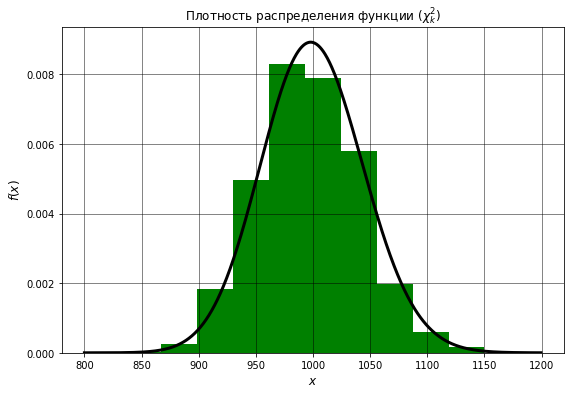

In [6]:
plt.figure(figsize = (9,6))
plt.title('Плотность распределения функции ($\chi^2_k$)')
plt.hist(value[0], normed = True, color = 'green')
plt.grid(True)
plt.plot(x, chi(x), color = 'black', linewidth = 3)
plt.xlabel('$x$', fontsize = 12)
plt.ylabel('$f(x)$', fontsize = 12)
plt.grid(True, color = 'black', alpha = 0.6)
plt.show()

### В нумпае есть функция hsplit, которая разбивает массив на несколько массивов. После разбиения получим список, элементом которого является нумпаевский массив размера 5, 10 и 50.

In [7]:
value_new_split_5 = np.hsplit(value_5[0], 1000)
value_new_split_10 = np.hsplit(value_10[0], 1000)
value_new_split_50 = np.hsplit(value_50[0], 1000)

In [8]:
type(value_new_split_50)

list

### Посмотрим на содержимое

In [9]:
print ('Содержимое списка value_new_split_5 после разбиения:\n\n', value_new_split_5[0:4])
print ('\nСодержимое списка value_new_split_10 после разбиения:\n\n', value_new_split_10[0:4])
print ('\nСодержимое списка value_new_split_50 после разбиения:\n\n', value_new_split_50[0:2])

Содержимое списка value_new_split_5 после разбиения:

 [array([1022.51026615,  993.1080533 ,  962.22542688, 1061.23176047,
       1007.92329749]), array([ 901.93320444, 1057.70511811,  929.71520341,  952.71096912,
        988.39957127]), array([1036.28809942, 1042.91960921,  927.17833162, 1051.25434712,
        984.87899213]), array([1037.16005972,  953.42141274,  969.34103163,  995.08345169,
        976.39154468])]

Содержимое списка value_new_split_10 после разбиения:

 [array([1039.04759869,  987.54129511,  939.22407946, 1103.18076005,
        988.6116905 ,  963.98796218,  982.02730377, 1001.66063472,
       1032.81708121,  953.72032587]), array([1107.82088989,  937.83283323,  980.68050457,  984.22902944,
        977.11568162, 1023.88873874, 1135.63094195,  946.33791476,
        995.024232  ,  993.17890413]), array([ 980.15429153, 1022.42703506,  986.42166793,  996.48556198,
       1059.91301284, 1058.87598248,  953.21501231,  944.71431925,
        977.48036033, 1012.78055092]), arr

In [10]:
sum(value_new_split_5[0])/len(value_new_split_5[0])

1009.3997608586315

### Далее запустим три цикла, в каждом из которых будем пробегать элементы списка. Например, нулевой элемент списка value_new_split_5 это нумпаевский массив, содержащий в себе 5 значений. Эти значения суммируем и делим на их количество и так далее. А потом добавлять полученные средние в пустые созданные списки

In [11]:
spisok_5 = []
spisok_10 = []
spisok_50 = []

for i in value_new_split_5:
    mean_5 = sum(i)/len(i)
    spisok_5.append(mean_5)

for j in value_new_split_10:
    mean_10 = sum(j)/len(j)
    spisok_10.append(mean_10)

for k in value_new_split_50:
    mean_50 = sum(k)/len(k)
    spisok_50.append(mean_50)

In [12]:
print (len(spisok_5))

1000


### Посмотрим на полученные списки со средними значениями

In [13]:
print ('spisok_5:\n',spisok_5[0:10])
print ('\nspisok_10:\n',spisok_10[0:10])
print ('\nspisok_50:\n',spisok_50[0:10])

spisok_5:
 [1009.3997608586315, 966.0928132707946, 1008.5038759007535, 986.2795000918359, 1009.0700079489876, 1001.0004403044738, 1012.9934605973783, 956.1282761986315, 1002.7252674676917, 1010.5684668035503]

spisok_10:
 [999.1818731569704, 1008.1739670329798, 999.2467794620877, 1010.2195960168825, 993.2360312602023, 963.639499063325, 988.0264459541171, 994.0238923051629, 1007.5259416420716, 999.9370849662607]

spisok_50:
 [1005.6705985993834, 1000.3964481529896, 997.9083563381038, 1007.2457045987359, 988.9561371018093, 995.6415966027588, 995.3738560400649, 1001.4594094656361, 1001.7315680439242, 999.7178650307462]


### Теперь давайте посмотрим на гистограммы распределений выборочных средних

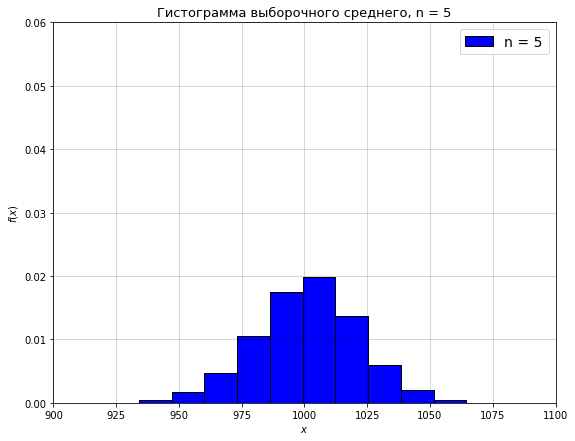

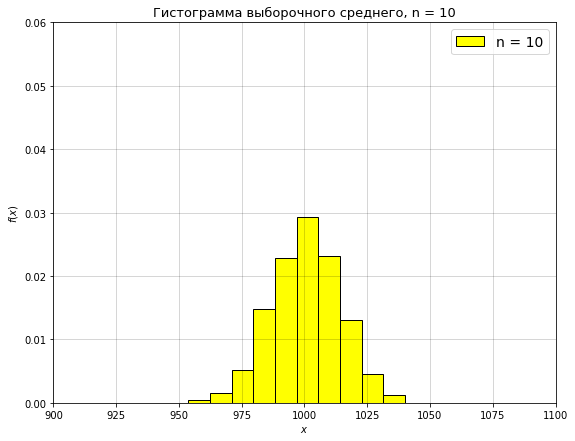

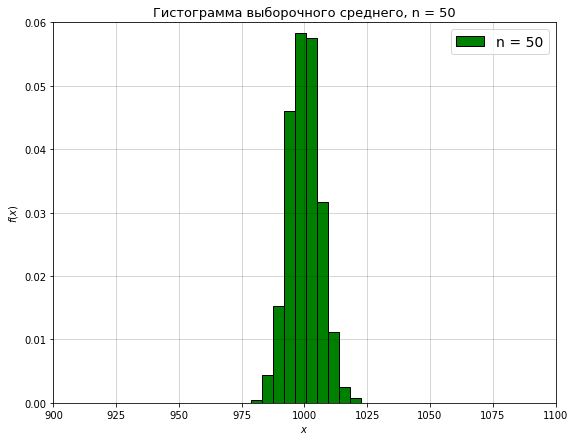

In [14]:
spiski = np.array([spisok_5, spisok_10, spisok_50])
colors = iter(['blue','yellow','green'])
Title = iter(['Гистограмма выборочного среднего, n = 5', 'Гистограмма выборочного среднего, n = 10', 'Гистограмма выборочного среднего, n = 50'])
legends = iter(['n = 5', 'n = 10', 'n = 50'])
for i in spiski:
    plt.figure(figsize = (9,7))
    plt.title(next(Title), fontsize = 13)
    plt.hist(i, normed = True, color = next(colors), alpha = 1, edgecolor = 'black', label = next(legends))
    plt.grid(True, color = 'black', alpha = 0.2)
    plt.legend(fontsize = 14)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.ylim(0, 0.06)
    plt.xlim(900, 1100)

Замечаем, что с увеличением объёма n, гистограмма подходит всё ближе и ближе к x = 1000. Сама гистограмма становится уже по оси x, но выше по оси y.

### Далее давайте наложим гистограммы друг на друга и посмотрим как друг относительно друга они меняются

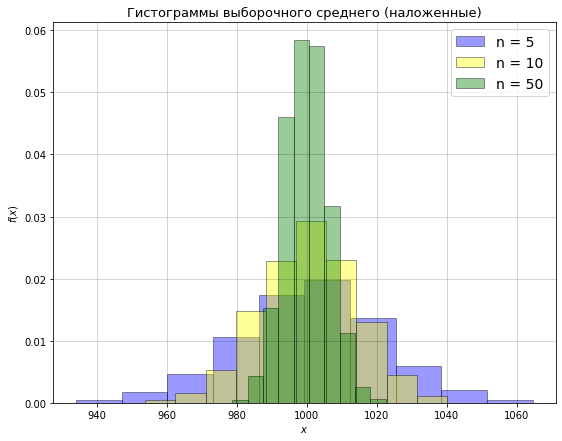

In [15]:
plt.figure(figsize = (9,7))
spiski = np.array([spisok_5, spisok_10, spisok_50])
colors = iter(['blue','yellow','green'])
legends = iter(['n = 5', 'n = 10', 'n = 50'])
for i in spiski:
    plt.title('Гистограммы выборочного среднего (наложенные)', fontsize = 13)
    plt.hist(i, normed = True, color = next(colors), alpha = 0.4, edgecolor = 'black', label = next(legends))
    plt.grid(True, color = 'black', alpha = 0.2)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(fontsize = 14)

### Характеристики распределения хи-квадрат

In [16]:
M = len(value[0])
D = 2*len(value[0])
sig = np.sqrt(D)
print ('Математическое ожидание исходного распределения:',M)
print ('Дисперсия исходного распредлеения:',D)
print ('Среднеквадратическое отклонение:', round(sig,3))

Математическое ожидание исходного распределения: 1000
Дисперсия исходного распредлеения: 2000
Среднеквадратическое отклонение: 44.721


### Теперь, используя среднее и дисперсию распределения хи-квадрат, построим нормальное распределение , для каждого объёма выборки n, учитывая что для каждого случая дисперсия будет делиться на число n.

In [17]:
n_5 = 5
n_10 = 10
n_50 = 50

M_5 = 1000
M_10 = 1000
M_50 = 1000

D_5 = D/n_5
D_10 = D/n_10
D_50 = D/n_50

sigma_5 = np.sqrt(D_5)
sigma_10 = np.sqrt(D_10)
sigma_50 = np.sqrt(D_50)

print ('Среднеквадратическое отклонение для случая n = 5:', sigma_5)
print ('Среднеквадратическое отклонение для случая n = 10:', sigma_10)
print ('Среднеквадратическое отклонение для случая n = 50:', sigma_50)

Среднеквадратическое отклонение для случая n = 5: 20.0
Среднеквадратическое отклонение для случая n = 10: 14.142135623730951
Среднеквадратическое отклонение для случая n = 50: 6.324555320336759


### Снова изобразим гистограммы и наложим на них нормальное распределение

(900, 1100)

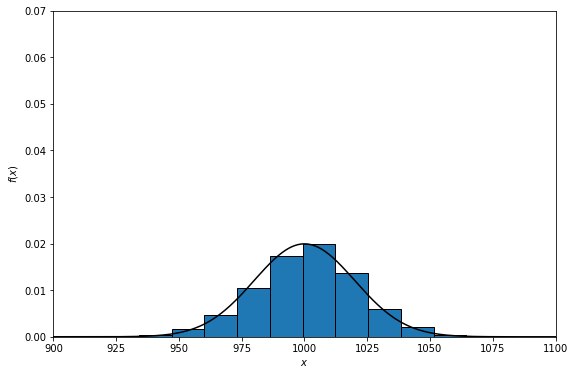

In [18]:
plt.figure(figsize = (9,6))
norm_5 = sts.norm(loc=M_5, scale=sigma_5)
x = np.arange(800,1200,0.5)
pdf_5 = norm_5.pdf(x) # функция может принимать и вектор (x)
plt.plot(x, pdf_5, color = 'black')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.hist(spisok_5, normed = True, edgecolor = 'black')
plt.ylim(0, 0.07)
plt.xlim(900, 1100)

(900, 1100)

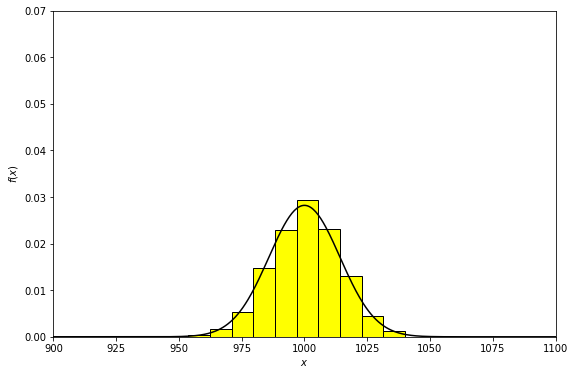

In [19]:
plt.figure(figsize = (9,6))
norm_10 = sts.norm(loc=M_10, scale=sigma_10)
x = np.arange(800,1200,0.5)
pdf_10 = norm_10.pdf(x) # функция может принимать и вектор (x)
plt.plot(x, pdf_10, color = 'black')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.hist(spisok_10, normed = True, edgecolor = 'black', color = 'yellow')
plt.ylim(0, 0.07)
plt.xlim(900, 1100)

(900, 1100)

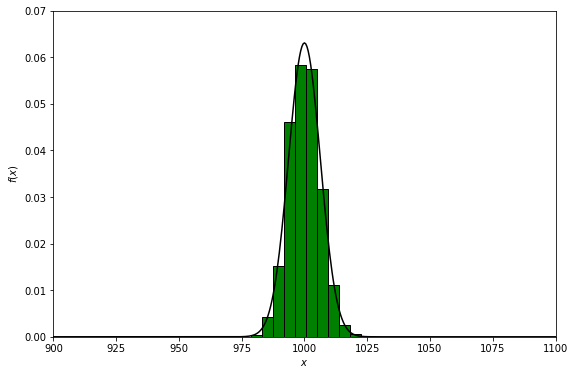

In [20]:
plt.figure(figsize = (9,6))
norm_50 = sts.norm(loc=M_50, scale=sigma_50)
x = np.arange(800,1200,0.5)
pdf_50 = norm_50.pdf(x) # функция может принимать и вектор (x)
plt.plot(x, pdf_50, color = 'black')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.hist(spisok_50, normed = True, edgecolor = 'black', color = 'green')
plt.ylim(0, 0.07)
plt.xlim(900, 1100)

### Выводы ниже

## А тут привожу пример другого распределения. Без комментариев!

### Теперь давайте посмотрим на более интересное распределение в виде арксинуса.

In [21]:
Value = []
Value_5 = []
Value_10 = []
Value_50 = []

x = np.arange(0.01,1, 0.01)

def ARC(x):
    func = sts.arcsine()
    Value.append(func.rvs(1000))
    Value_5.append(func.rvs(5000))
    Value_10.append(func.rvs(10000))
    Value_50.append(func.rvs(50000))
    return func.pdf(x)

In [22]:
print (ARC(x)[0:10])

[3.19913473 2.27364204 1.8659656  1.62436834 1.46050592 1.34032641
 1.2475548  1.17330581 1.11226476 1.06103295]


In [23]:
print (Value_5)

[array([0.25323568, 0.72616385, 0.35748935, ..., 0.85126582, 0.94160349,
       0.99699365])]


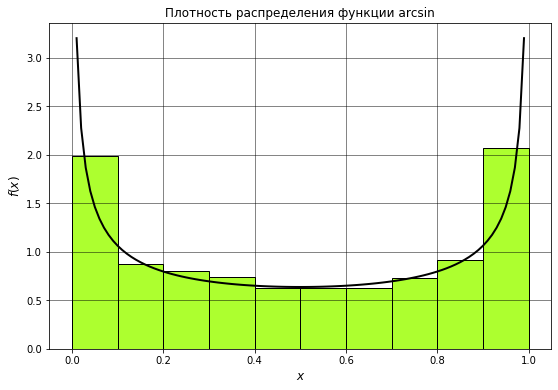

In [24]:
plt.figure(figsize = (9,6))
plt.title('Плотность распределения функции arcsin')
plt.hist(Value[0], normed = True, color = 'greenyellow', edgecolor = 'black')
plt.grid(True)
plt.plot(x, ARC(x), color = 'black', linewidth = 2)
plt.xlabel('$x$', fontsize = 12)
plt.ylabel('$f(x)$', fontsize = 12)
plt.grid(True, color = 'black', alpha = 0.6)
plt.show()

In [25]:
Value_split_5 = np.hsplit(Value_5[0], 1000)
Value_split_10 = np.hsplit(Value_10[0], 1000)
Value_split_50 = np.hsplit(Value_50[0], 1000)

In [26]:
print (len(Value_split_10))

1000


In [27]:
Spisok_5 = []
Spisok_10 = []
Spisok_50 = []

for i in Value_split_5:
    Mean_5 = sum(i)/len(i)
    Spisok_5.append(Mean_5)

for j in Value_split_10:
    Mean_10 = sum(j)/len(j)
    Spisok_10.append(Mean_10)

for k in Value_split_50:
    Mean_50 = sum(k)/len(k)
    Spisok_50.append(Mean_50)

In [28]:
len(Spisok_10)

1000

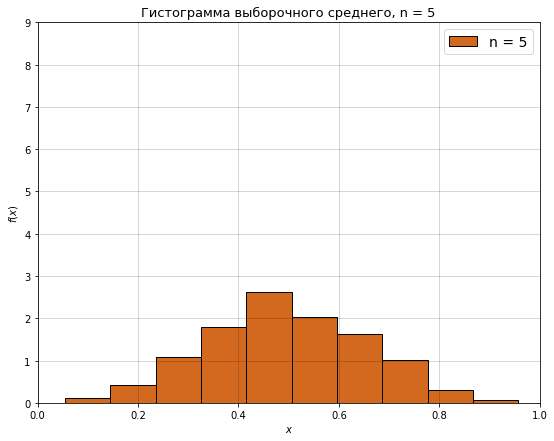

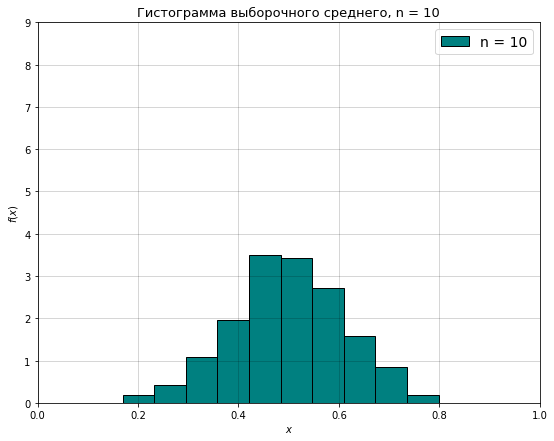

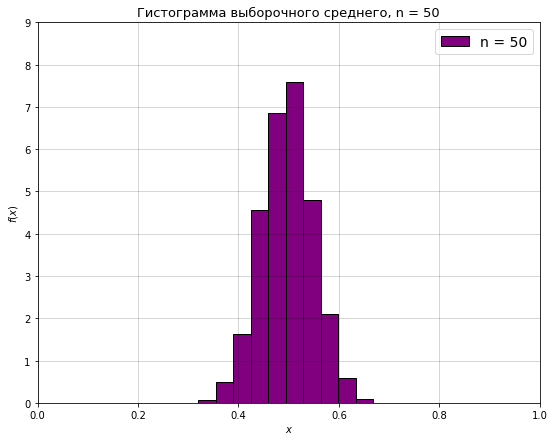

In [29]:
Spiski = np.array([Spisok_5, Spisok_10, Spisok_50])
colors = iter(['chocolate','teal','purple'])
Title = iter(['Гистограмма выборочного среднего, n = 5', 'Гистограмма выборочного среднего, n = 10', 'Гистограмма выборочного среднего, n = 50'])
legends = iter(['n = 5', 'n = 10', 'n = 50'])
for i in Spiski:
    plt.figure(figsize = (9,7))
    plt.title(next(Title), fontsize = 13)
    plt.hist(i, normed = True, color = next(colors), alpha = 1, edgecolor = 'black', label = next(legends))
    plt.grid(True, color = 'black', alpha = 0.2)
    plt.legend(fontsize = 14)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.ylim(0, 9)
    plt.xlim(0, 1)

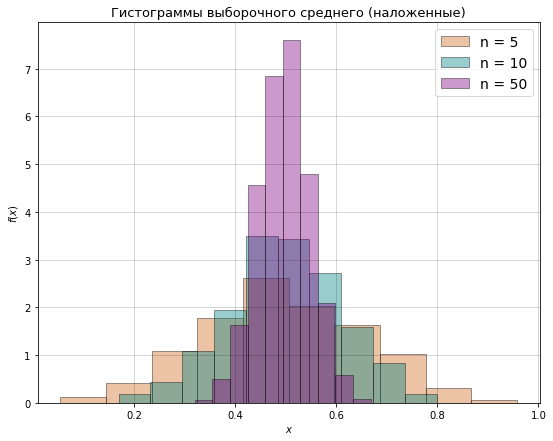

In [30]:
plt.figure(figsize = (9,7))
Spiski = np.array([Spisok_5, Spisok_10, Spisok_50])
colors = iter(['chocolate','teal','purple'])
legends = iter(['n = 5', 'n = 10', 'n = 50'])
for i in Spiski:
    plt.title('Гистограммы выборочного среднего (наложенные)', fontsize = 13)
    plt.hist(i, normed = True, color = next(colors), alpha = 0.4, edgecolor = 'black', label = next(legends))
    plt.grid(True, color = 'black', alpha = 0.2)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(fontsize = 14)

In [31]:
n_5 = 5
n_10 = 10
n_50 = 50

Mat = 0.5

Dis_5 = 1/(8*n_5)
Dis_10 = 1/(8*n_10)
Dis_50 = 1/(8*n_50)

Sigma_5 = np.sqrt(Dis_5)
Sigma_10 = np.sqrt(Dis_10)
Sigma_50 = np.sqrt(Dis_50)

print ('Математическое ожидание исходного распределения:', Mat)
print ('Дисперсия исходного распределения:', 1/8)
print ('\nСреднеквадратическое отклонение для случая n = 5:', Sigma_5)
print ('Среднеквадратическое отклонение для случая n = 10:', Sigma_10)
print ('Среднеквадратическое отклонение для случая n = 50:', Sigma_50)

Математическое ожидание исходного распределения: 0.5
Дисперсия исходного распределения: 0.125

Среднеквадратическое отклонение для случая n = 5: 0.15811388300841897
Среднеквадратическое отклонение для случая n = 10: 0.11180339887498948
Среднеквадратическое отклонение для случая n = 50: 0.05


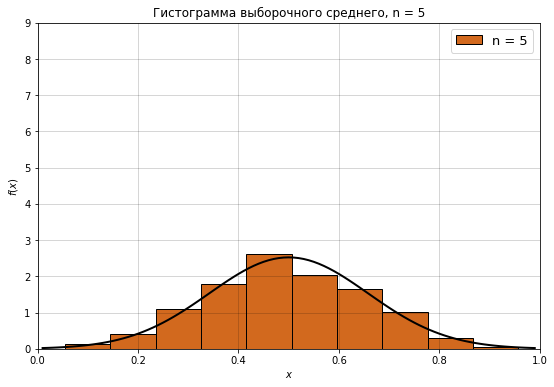

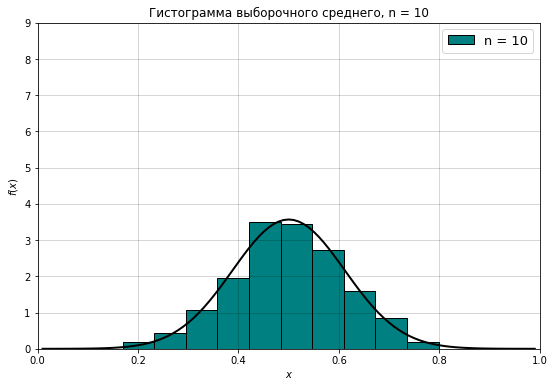

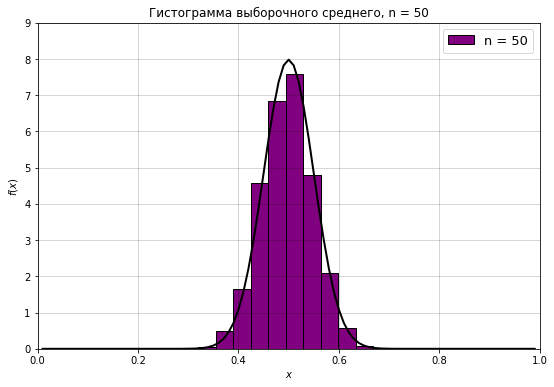

In [32]:
Scales = iter([Sigma_5, Sigma_10, Sigma_50])
colors = iter(['chocolate','teal','purple'])
Spiski = np.array([Spisok_5, Spisok_10, Spisok_50])
Title = iter(['Гистограмма выборочного среднего, n = 5', 'Гистограмма выборочного среднего, n = 10', 'Гистограмма выборочного среднего, n = 50'])
legends = iter(['n = 5', 'n = 10', 'n = 50'])

for s in Spiski:
    norm_s = sts.norm(loc=Mat, scale=next(Scales))
    pdf_s = norm_s.pdf(x) 
    plt.figure(figsize = (9,6))
    plt.hist(s, normed = True, color = next(colors), alpha = 1, edgecolor = 'black', label = next(legends))
    plt.xlim(0,1)
    plt.ylim(0,9)
    plt.plot(x, pdf_s, color = 'black', linewidth = 2)
    plt.title(next(Title))
    plt.grid(True, color = 'black', alpha = 0.2)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(fontsize = 13)

### Выводы: Да, действительно, центральная предельная теорема работает. На двух распределениях мы убедились, что , работая с выборочным средним, и увеличивая объём выборки, гистограмма выборочного среднего стремится к нормальному. И на примере распределения арксинуса, совсем нетривиального, мы убедились, что выборочное среднее из этого распределения стремится к нормальному!